In [38]:
from Almanac.Data import get_weather_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from Almanac.Models import hw_weekly_frost_date_forecast
import copy
from datetime import datetime

In [2]:
df = get_weather_data("Chicago, IL, 60601, US", "2018-01-01", "2021-12-31")

In [3]:
df

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2018-01-01,-19.1,-21.7,-16.1,0.0,51.0,281.0,16.9,NaN,1041.9,NaN
2018-01-02,-18.5,-23.3,-13.9,0.0,51.0,234.0,18.4,NaN,1035.2,NaN
2018-01-03,-10.0,-13.9,-7.8,0.0,51.0,279.0,20.7,NaN,1021.2,NaN
2018-01-04,-14.0,-16.7,-10.6,0.0,51.0,322.0,19.2,NaN,1027.6,NaN
2018-01-05,-14.8,-17.8,-11.1,0.0,51.0,315.0,16.7,NaN,1032.1,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-27,5.1,1.1,8.9,6.9,0.0,289.0,17.2,NaN,1006.7,NaN
2021-12-28,2.3,0.6,3.9,6.9,25.0,92.0,12.1,NaN,1008.1,NaN
2021-12-29,2.5,0.0,3.9,0.5,0.0,322.0,13.9,NaN,1012.7,NaN


In [4]:
prediction, os = hw_weekly_frost_date_forecast(df)

In [5]:
prediction

2022-01-09    -7.873197
2022-01-16   -11.648214
2022-01-23    -9.973082
2022-01-30   -13.723133
2022-02-06   -13.998276
2022-02-13   -15.248191
2022-02-20    -9.148143
2022-02-27    -6.348121
2022-03-06    -7.623186
2022-03-13    -1.073249
2022-03-20    -1.648209
2022-03-27    -0.648221
2022-04-03    -2.198249
2022-04-10     2.651756
2022-04-17     0.301821
2022-04-24     1.701877
2022-05-01     5.301887
2022-05-08     5.026862
2022-05-15     6.001877
2022-05-22    11.701832
2022-05-29    10.726854
2022-06-05    12.276853
2022-06-12    16.151880
2022-06-19    14.751899
2022-06-26    16.976889
2022-07-03    18.901927
2022-07-10    18.626874
2022-07-17    20.176890
2022-07-24    18.501891
2022-07-31    18.076936
2022-08-07    17.952012
2022-08-14    18.751868
2022-08-21    17.676897
2022-08-28    18.526927
2022-09-04    15.726925
2022-09-11    15.001823
2022-09-18    14.201893
2022-09-25    11.151851
2022-10-02    11.152005
2022-10-09     6.827094
2022-10-16     3.376888
2022-10-23     4

In [6]:
os

0.5

In [7]:
import plotly.express as px

In [54]:
figure = px.line(x=prediction.index, y=prediction)
figure.update_layout(
    title={
        "text": f"Holt Winters Prediction Weekly Min Temperature {figure.data[0].x[0].strftime('%Y-%m-%d')} to {figure.data[0].x[-1].strftime('%Y-%m-%d')}",
        "x": 0.5,
        "y": 0.95,
        "xanchor": "center",
    },
    title_font={"color": "deepskyblue", "size": 20},
)
figure.update_xaxes(title="Date")
figure.update_yaxes(title="Temperature")

In [47]:
figure.data[0].x[0].strftime("%Y-%m-%d")

'2022-01-09'

In [51]:
f"Holt Winters Prediction {figure.data[0].x[0].strftime('%Y-%m-%d')} to {figure.data[0].x[-1].strftime('%Y-%m-%d')}"

'Holt Winters Prediction 2022-01-09 to 2023-01-01'

In [7]:
t = 2015

In [8]:
df_test = get_weather_data(
    "Chicago, IL, 60601, US", f"{str(t)}-01-01", "2023-12-31"
)

In [9]:
df_test

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
2015-01-01,-4.3,-8.3,0.0,0.0,0.0,240.0,25.5,NaN,1019.8,NaN
2015-01-02,-1.5,-6.7,2.2,0.0,0.0,NaN,7.8,NaN,1025.3,NaN
2015-01-03,1.6,-0.6,2.8,15.0,0.0,NaN,8.5,NaN,1013.7,NaN
2015-01-04,-3.7,-15.0,2.2,4.6,51.0,305.0,20.2,NaN,NaN,NaN
2015-01-05,-15.6,-18.3,-12.2,3.8,102.0,NaN,17.5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-11-19,5.8,1.8,9.8,NaN,NaN,316.0,12.0,NaN,1016.5,NaN
2023-11-20,5.9,3.3,8.6,NaN,NaN,137.0,15.1,NaN,1018.2,NaN
2023-11-21,5.5,3.9,8.1,NaN,NaN,239.0,15.6,NaN,1016.8,NaN


In [10]:
df_test["tmin"].resample("W").min()

time
2015-01-04   -15.0
2015-01-11   -21.7
2015-01-18   -15.0
2015-01-25    -3.3
2015-02-01    -6.1
              ... 
2023-10-29     3.9
2023-11-05    -2.8
2023-11-12     0.0
2023-11-19    -1.0
2023-11-26     0.6
Freq: W-SUN, Name: tmin, Length: 465, dtype: float64

In [11]:
years = list(range(1980, 2022))

In [12]:
df_dict = {}
pred_dict = {}
os_dict = {}

In [13]:
for year in years:
    df = get_weather_data("Chicago, IL", "1970-01-01", f"{str(year)}-12-31")
    prediction, os = hw_weekly_frost_date_forecast(df)
    df_dict[year + 1] = get_weather_data(
        "Chicago, IL", f"{str(year+1)}-01-01", f"{str(year+1)}-12-31"
    )
    pred_dict[year + 1] = prediction
    os_dict[year + 1] = os

In [14]:
pred_dict[1982].index

DatetimeIndex(['1982-01-10', '1982-01-17', '1982-01-24', '1982-01-31',
               '1982-02-07', '1982-02-14', '1982-02-21', '1982-02-28',
               '1982-03-07', '1982-03-14', '1982-03-21', '1982-03-28',
               '1982-04-04', '1982-04-11', '1982-04-18', '1982-04-25',
               '1982-05-02', '1982-05-09', '1982-05-16', '1982-05-23',
               '1982-05-30', '1982-06-06', '1982-06-13', '1982-06-20',
               '1982-06-27', '1982-07-04', '1982-07-11', '1982-07-18',
               '1982-07-25', '1982-08-01', '1982-08-08', '1982-08-15',
               '1982-08-22', '1982-08-29', '1982-09-05', '1982-09-12',
               '1982-09-19', '1982-09-26', '1982-10-03', '1982-10-10',
               '1982-10-17', '1982-10-24', '1982-10-31', '1982-11-07',
               '1982-11-14', '1982-11-21', '1982-11-28', '1982-12-05',
               '1982-12-12', '1982-12-19', '1982-12-26', '1983-01-02'],
              dtype='datetime64[ns]', freq='W-SUN')

In [15]:
df_dict[1982]["tmin"].resample("W").min()

time
1982-01-03    -8.9
1982-01-10   -30.0
1982-01-17   -27.2
1982-01-24   -19.4
1982-01-31   -22.8
1982-02-07   -24.4
1982-02-14   -24.4
1982-02-21    -3.3
1982-02-28   -11.1
1982-03-07   -13.3
1982-03-14   -16.1
1982-03-21     0.0
1982-03-28    -7.2
1982-04-04    -7.2
1982-04-11   -12.2
1982-04-18    -0.6
1982-04-25    -1.1
1982-05-02     0.0
1982-05-09     8.3
1982-05-16    13.3
1982-05-23     7.2
1982-05-30    11.7
1982-06-06     6.7
1982-06-13     8.3
1982-06-20     7.2
1982-06-27     8.3
1982-07-04     9.4
1982-07-11    14.4
1982-07-18    16.1
1982-07-25    17.2
1982-08-01    13.9
1982-08-08    17.8
1982-08-15    10.0
1982-08-22    13.3
1982-08-29     7.8
1982-09-05    10.6
1982-09-12    12.2
1982-09-19     6.7
1982-09-26     5.6
1982-10-03     8.9
1982-10-10     7.2
1982-10-17     1.1
1982-10-24    -2.8
1982-10-31    -1.7
1982-11-07    -2.8
1982-11-14    -6.1
1982-11-21    -8.9
1982-11-28    -8.3
1982-12-05     2.8
1982-12-12   -12.8
1982-12-19    -8.9
1982-12-26    -8.3
1983-01

In [16]:
os_dict[1982]

0.5

In [17]:
def binarize(df, cols, thresh=0):
    """
    A function to binarize weather data.
    Sets values less than 0 to 1 and sets values greater then 0 to 0.

    Parameters:

    df : pandas.DataFrame
        A DataFrame object containing weather data.

    cols : str | list
        A string or list of strings containing
        the names of columns in df to binarize.

    thresh : float
        A number to split the binarization on.
        Values below thresh are assigned 1,
        values above thresh are assigned 0.


    Returns:

    df : pandas.DataFrame
        A DataFrame containing the original columns of df and
        the new columns of binarized data.
    """

    if isinstance(cols, str):
        df[cols + "_bin"] = df[cols]

        for i, temp in enumerate(df[cols + "_bin"]):
            if temp <= thresh:
                df[cols + "_bin"].iloc[i] = 1
            else:
                df[cols + "_bin"].iloc[i] = 0

    elif isinstance(cols, list):
        for col in cols:
            df[col + "_bin"] = df[col]

            for i, temp in enumerate(df[col + "_bin"]):
                if temp <= thresh:
                    df[col + "_bin"].iloc[i] = 1
                else:
                    df[col + "_bin"].iloc[i] = 0

    return df

In [18]:
test_pred = pred_dict[1981]

In [19]:
test_pred.iloc[1]

-12.55235537410323

In [20]:
for i, temp in enumerate(test_pred):
    if temp <= 0:
        test_pred.iloc[i] = 1
    else:
        test_pred.iloc[i] = 0

In [21]:
test_pred

1981-01-11    1.0
1981-01-18    1.0
1981-01-25    1.0
1981-02-01    1.0
1981-02-08    1.0
1981-02-15    1.0
1981-02-22    1.0
1981-03-01    1.0
1981-03-08    1.0
1981-03-15    1.0
1981-03-22    1.0
1981-03-29    1.0
1981-04-05    0.0
1981-04-12    0.0
1981-04-19    0.0
1981-04-26    0.0
1981-05-03    0.0
1981-05-10    0.0
1981-05-17    0.0
1981-05-24    0.0
1981-05-31    0.0
1981-06-07    0.0
1981-06-14    0.0
1981-06-21    0.0
1981-06-28    0.0
1981-07-05    0.0
1981-07-12    0.0
1981-07-19    0.0
1981-07-26    0.0
1981-08-02    0.0
1981-08-09    0.0
1981-08-16    0.0
1981-08-23    0.0
1981-08-30    0.0
1981-09-06    0.0
1981-09-13    0.0
1981-09-20    0.0
1981-09-27    0.0
1981-10-04    0.0
1981-10-11    0.0
1981-10-18    0.0
1981-10-25    0.0
1981-11-01    0.0
1981-11-08    1.0
1981-11-15    1.0
1981-11-22    1.0
1981-11-29    1.0
1981-12-06    1.0
1981-12-13    1.0
1981-12-20    1.0
1981-12-27    1.0
1982-01-03    1.0
Freq: W-SUN, dtype: float64

In [22]:
pred_dict_copy = copy.deepcopy(pred_dict)

In [23]:
pred_dict_copy.keys()

dict_keys([1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [24]:
for year in pred_dict_copy.keys():
    for i, temp in enumerate(pred_dict_copy[year]):
        if temp <= 0:
            pred_dict_copy[year].iloc[i] = 1
        else:
            pred_dict_copy[year].iloc[i] = 0

In [25]:
pred_dict_copy[1982]

1982-01-10    1.0
1982-01-17    1.0
1982-01-24    1.0
1982-01-31    1.0
1982-02-07    1.0
1982-02-14    1.0
1982-02-21    1.0
1982-02-28    1.0
1982-03-07    1.0
1982-03-14    1.0
1982-03-21    1.0
1982-03-28    1.0
1982-04-04    0.0
1982-04-11    0.0
1982-04-18    0.0
1982-04-25    0.0
1982-05-02    0.0
1982-05-09    0.0
1982-05-16    0.0
1982-05-23    0.0
1982-05-30    0.0
1982-06-06    0.0
1982-06-13    0.0
1982-06-20    0.0
1982-06-27    0.0
1982-07-04    0.0
1982-07-11    0.0
1982-07-18    0.0
1982-07-25    0.0
1982-08-01    0.0
1982-08-08    0.0
1982-08-15    0.0
1982-08-22    0.0
1982-08-29    0.0
1982-09-05    0.0
1982-09-12    0.0
1982-09-19    0.0
1982-09-26    0.0
1982-10-03    0.0
1982-10-10    0.0
1982-10-17    0.0
1982-10-24    0.0
1982-10-31    0.0
1982-11-07    1.0
1982-11-14    1.0
1982-11-21    1.0
1982-11-28    1.0
1982-12-05    1.0
1982-12-12    1.0
1982-12-19    1.0
1982-12-26    1.0
1983-01-02    1.0
Freq: W-SUN, dtype: float64

In [26]:
pred_dict[1982]

1982-01-10   -15.687258
1982-01-17   -12.856922
1982-01-24   -14.016940
1982-01-31   -16.982348
1982-02-07   -14.031004
1982-02-14   -10.272049
1982-02-21    -8.687362
1982-02-28    -6.330950
1982-03-07    -5.823605
1982-03-14    -6.057247
1982-03-21    -3.641153
1982-03-28    -1.249192
1982-04-04     0.184790
1982-04-11     2.551242
1982-04-18     2.984947
1982-04-25     3.343351
1982-05-02     3.728271
1982-05-09     6.536558
1982-05-16     9.294671
1982-05-23     9.269665
1982-05-30    11.077228
1982-06-06    12.793033
1982-06-13    13.301720
1982-06-20    14.685115
1982-06-27    15.652321
1982-07-04    17.085162
1982-07-11    16.268119
1982-07-18    17.384419
1982-07-25    16.300694
1982-08-01    15.508091
1982-08-08    16.725880
1982-08-15    15.651339
1982-08-22    16.160013
1982-08-29    14.353468
1982-09-05    12.269822
1982-09-12    10.112754
1982-09-19     8.610861
1982-09-26     6.953158
1982-10-03     4.311294
1982-10-10     3.802382
1982-10-17     2.336087
1982-10-24     1

In [27]:
def get_frost_dates(data):
    """
    A function that finds the dates of the first and last frost of a season
    for every year in data.
    First frost is defined as the first day after summer where the minimum
    temp is <= 0C.
    Last frost is defined as the last day before summer where the minimum temp
    is <= 0C.


    Parameters:

    data : pandas.DataFrame
        A DataFrame object containing weather data.


    Returns:

    first_frost : list
        A list of the first frost dates of each year.

    last_frost : list
        A list of the last frost dates of each year.
    """

    # If binarized column does not exist,
    # create it.
    if "tmin_bin" in data.columns:
        pass
    else:
        data = binarize(data, "tmin")

    # Create the dict data_year
    # This is a dictionary of DataFrames
    # for each year of data with years as keys
    data_year = {}

    for y in data.index.year.unique():
        data_year[y] = data.loc[data.index.year == y]

    # Create lists of the first and last frost dates.
    last_frost = []
    first_frost = []

    # Divide the years in half.
    # Note this split assumes a location in the Northern Hemisphere
    for y in data_year.keys():
        first_half = data_year[y].loc[data_year[y].index.month < 7]
        second_half = data_year[y].loc[data_year[y].index.month > 7]

        try:
            last_frost.append(
                first_half["tmin_bin"][first_half["tmin_bin"] == 1].index[-1]
            )
        except Exception:
            last_frost.append(None)

        try:
            first_frost.append(
                second_half["tmin_bin"][second_half["tmin_bin"] == 1].index[0]
            )
        except Exception:
            first_frost.append(None)

    return first_frost, last_frost

In [28]:
last_frost_pred = []
first_frost_pred = []

In [29]:
for year in pred_dict_copy.keys():
    pred_dict_copy[year].drop(pred_dict_copy[year].index[-1], inplace=True)

In [30]:
for year in pred_dict_copy.keys():
    first_half = pred_dict_copy[year].loc[pred_dict_copy[year].index.month < 7]
    second_half = pred_dict_copy[year].loc[
        pred_dict_copy[year].index.month > 7
    ]

    try:
        last_frost_pred.append(first_half[first_half == 1].index[-1])
    except Exception:
        last_frost_pred.append(None)

    try:
        first_frost_pred.append(second_half[second_half == 1].index[0])
    except Exception:
        first_frost_pred.append(None)

In [31]:
first_frost_pred

[Timestamp('1981-08-02 00:00:00'),
 Timestamp('1982-11-07 00:00:00'),
 Timestamp('1983-11-06 00:00:00'),
 Timestamp('1984-09-23 00:00:00'),
 Timestamp('1985-11-17 00:00:00'),
 Timestamp('1986-09-28 00:00:00'),
 Timestamp('1987-11-15 00:00:00'),
 Timestamp('1988-11-13 00:00:00'),
 Timestamp('1989-11-12 00:00:00'),
 Timestamp('1990-09-23 00:00:00'),
 Timestamp('1991-10-27 00:00:00'),
 Timestamp('1992-11-08 00:00:00'),
 Timestamp('1993-11-07 00:00:00'),
 Timestamp('1994-11-06 00:00:00'),
 Timestamp('1995-11-19 00:00:00'),
 Timestamp('1996-10-20 00:00:00'),
 Timestamp('1997-11-02 00:00:00'),
 Timestamp('1998-11-08 00:00:00'),
 Timestamp('1999-10-31 00:00:00'),
 Timestamp('2000-10-29 00:00:00'),
 Timestamp('2001-09-23 00:00:00'),
 Timestamp('2002-11-10 00:00:00'),
 Timestamp('2003-11-09 00:00:00'),
 Timestamp('2004-11-07 00:00:00'),
 Timestamp('2005-11-06 00:00:00'),
 Timestamp('2006-10-15 00:00:00'),
 Timestamp('2007-11-04 00:00:00'),
 Timestamp('2008-11-02 00:00:00'),
 Timestamp('2009-10-

In [32]:
last_frost_pred

[Timestamp('1981-06-28 00:00:00'),
 Timestamp('1982-03-28 00:00:00'),
 Timestamp('1983-03-20 00:00:00'),
 Timestamp('1984-05-06 00:00:00'),
 Timestamp('1985-03-10 00:00:00'),
 Timestamp('1986-05-04 00:00:00'),
 Timestamp('1987-03-08 00:00:00'),
 Timestamp('1988-03-06 00:00:00'),
 Timestamp('1989-03-19 00:00:00'),
 Timestamp('1990-04-29 00:00:00'),
 Timestamp('1991-03-17 00:00:00'),
 Timestamp('1992-03-01 00:00:00'),
 Timestamp('1993-03-07 00:00:00'),
 Timestamp('1994-03-13 00:00:00'),
 Timestamp('1995-02-26 00:00:00'),
 Timestamp('1996-04-14 00:00:00'),
 Timestamp('1997-03-09 00:00:00'),
 Timestamp('1998-02-22 00:00:00'),
 Timestamp('1999-03-07 00:00:00'),
 Timestamp('2000-03-05 00:00:00'),
 Timestamp('2001-04-08 00:00:00'),
 Timestamp('2002-03-24 00:00:00'),
 Timestamp('2003-03-30 00:00:00'),
 Timestamp('2004-03-28 00:00:00'),
 Timestamp('2005-04-03 00:00:00'),
 Timestamp('2006-04-16 00:00:00'),
 Timestamp('2007-03-25 00:00:00'),
 Timestamp('2008-03-23 00:00:00'),
 Timestamp('2009-04-

In [33]:
last_frost = []
first_frost = []

In [34]:
for year in df_dict.keys():
    first, last = get_frost_dates(df_dict[year])
    first_frost.append(first)
    last_frost.append(last)

In [35]:
first_frost

[[Timestamp('1981-10-03 00:00:00')],
 [Timestamp('1982-10-22 00:00:00')],
 [Timestamp('1983-11-05 00:00:00')],
 [Timestamp('1984-10-24 00:00:00')],
 [Timestamp('1985-11-17 00:00:00')],
 [Timestamp('1986-11-02 00:00:00')],
 [Timestamp('1987-10-08 00:00:00')],
 [Timestamp('1988-10-13 00:00:00')],
 [Timestamp('1989-11-02 00:00:00')],
 [Timestamp('1990-10-19 00:00:00')],
 [Timestamp('1991-10-16 00:00:00')],
 [Timestamp('1992-10-17 00:00:00')],
 [Timestamp('1993-10-10 00:00:00')],
 [Timestamp('1994-11-19 00:00:00')],
 [Timestamp('1995-11-02 00:00:00')],
 [Timestamp('1996-10-30 00:00:00')],
 [Timestamp('1997-10-27 00:00:00')],
 [Timestamp('1998-11-06 00:00:00')],
 [Timestamp('1999-10-24 00:00:00')],
 [Timestamp('2000-10-07 00:00:00')],
 [Timestamp('2001-10-07 00:00:00')],
 [Timestamp('2002-11-01 00:00:00')],
 [Timestamp('2003-10-02 00:00:00')],
 [Timestamp('2004-10-17 00:00:00')],
 [Timestamp('2005-11-10 00:00:00')],
 [Timestamp('2006-10-12 00:00:00')],
 [Timestamp('2007-11-07 00:00:00')],
 

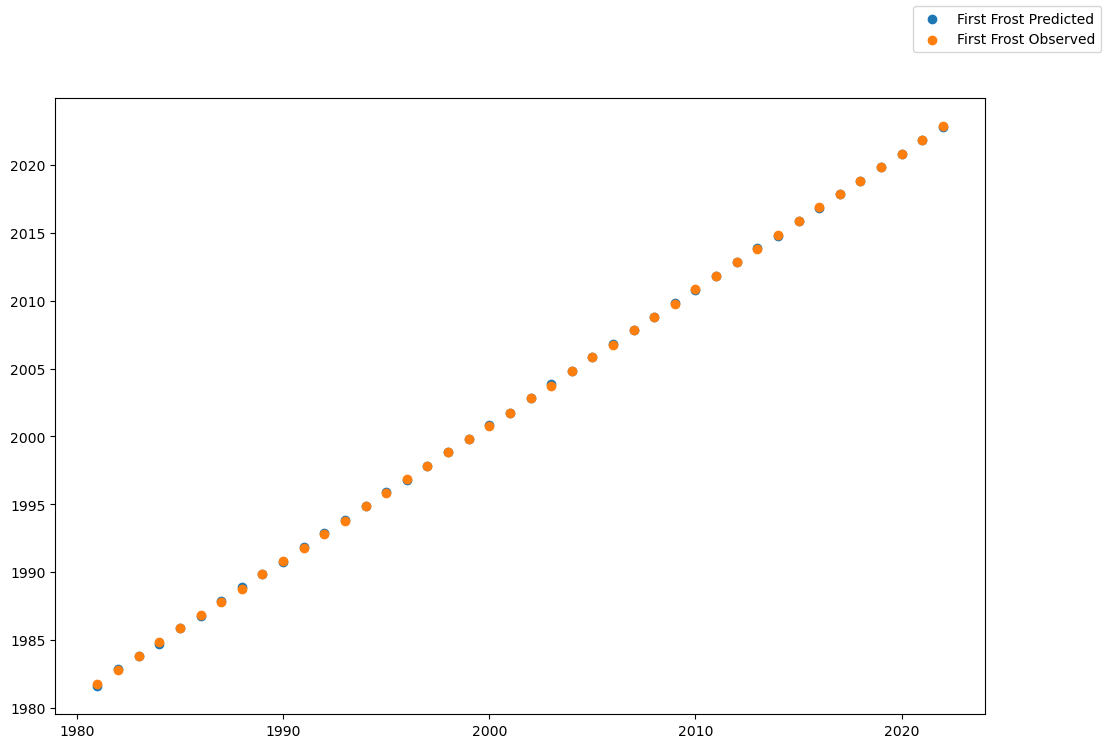

In [36]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(
    x=range(1981, 2023), y=first_frost_pred, label="First Frost Predicted"
)
plt.scatter(x=range(1981, 2023), y=first_frost, label="First Frost Observed")
fig.legend()

In [37]:
first_frost_pred[0] - first_frost[0][0]

Timedelta('-62 days +00:00:00')

In [38]:
first_frost_diffs = []

In [39]:
len(first_frost_pred)

42

In [40]:
for i in range(len(first_frost_pred)):
    first_frost_diffs.append(first_frost_pred[i] - first_frost[i][0])

In [41]:
first_frost_diffs[0].days

-62

Text(0, 0.5, 'days')

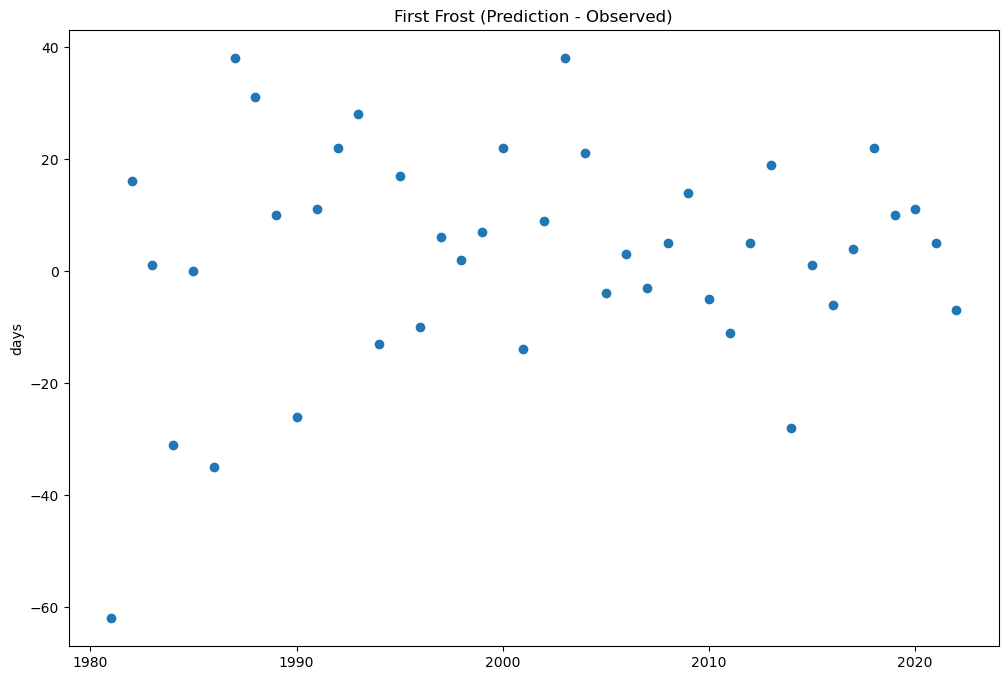

In [42]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(x=range(1981, 2023), y=[x.days for x in first_frost_diffs])
fig.get_axes()[0].set_title("First Frost (Prediction - Observed)")
fig.get_axes()[0].set_ylabel("days")

In [43]:
last_frost_diffs = []

In [44]:
for i in range(len(last_frost_pred)):
    last_frost_diffs.append(last_frost_pred[i] - last_frost[i][0])

Text(0, 0.5, 'days')

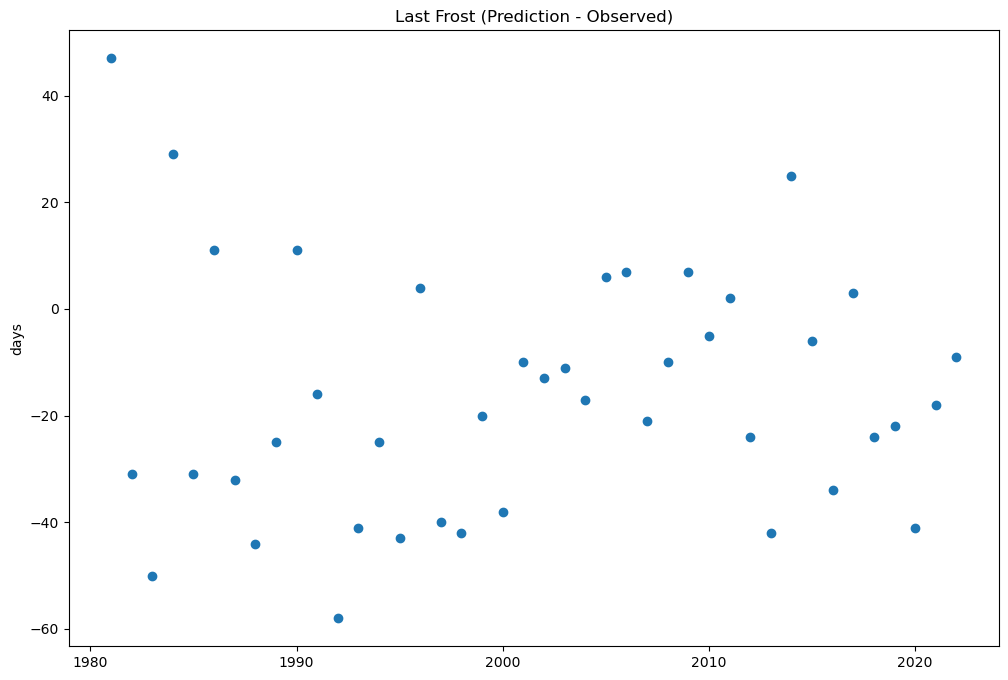

In [45]:
fig2 = plt.figure(figsize=(12, 8))
plt.scatter(x=range(1981, 2023), y=[x.days for x in last_frost_diffs])
fig2.get_axes()[0].set_title("Last Frost (Prediction - Observed)")
fig2.get_axes()[0].set_ylabel("days")

In [46]:
first_frost[0]

[Timestamp('1981-10-03 00:00:00')]

In [47]:
first_frost_pred[0]

Timestamp('1981-08-02 00:00:00')

In [48]:
first_frost_pred[0] - first_frost[0][0]

Timedelta('-62 days +00:00:00')

In [49]:
last_frost[0]

[Timestamp('1981-05-12 00:00:00')]

Offset = 0

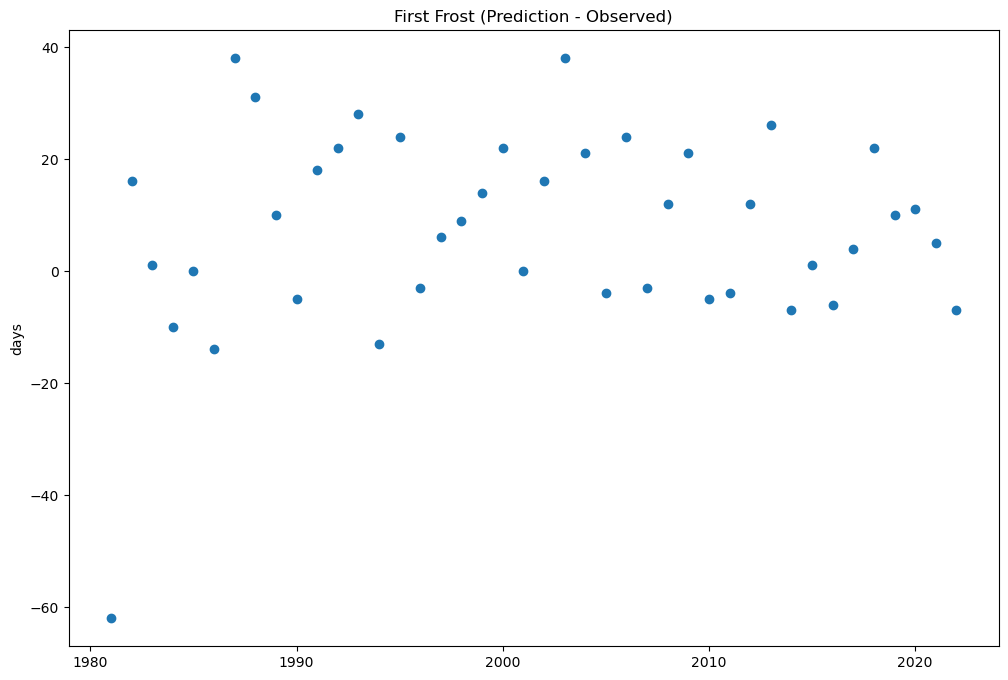

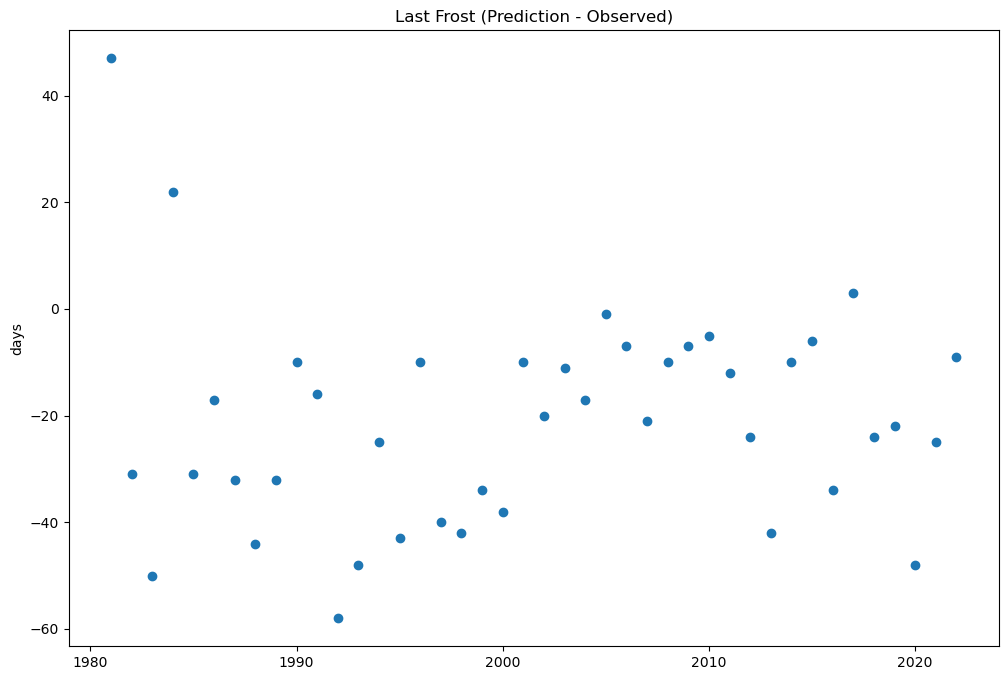

Max Offset = 3.5
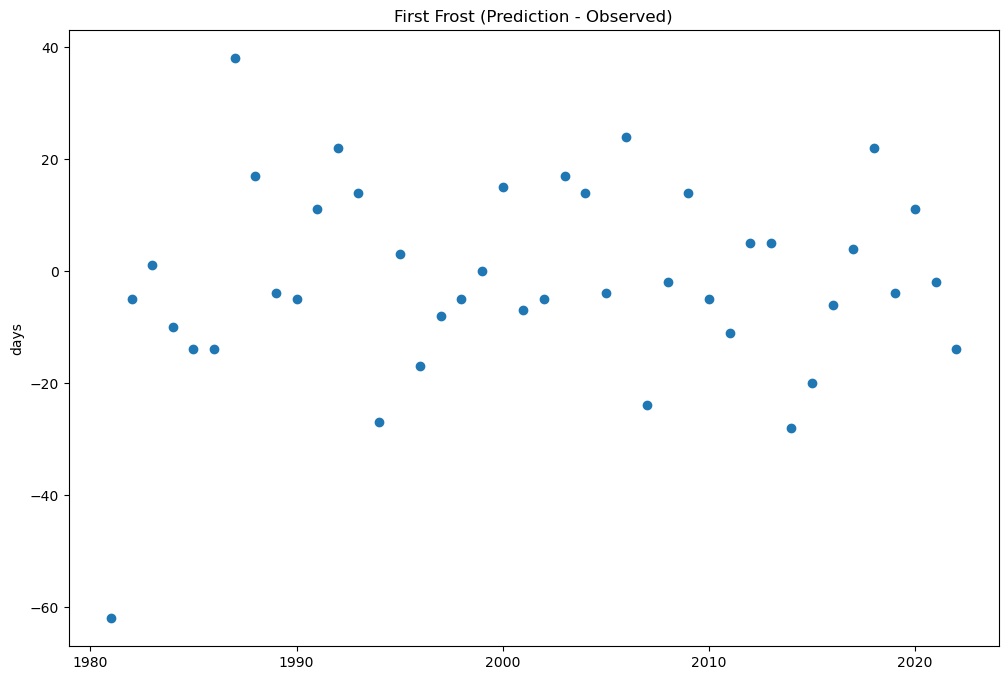

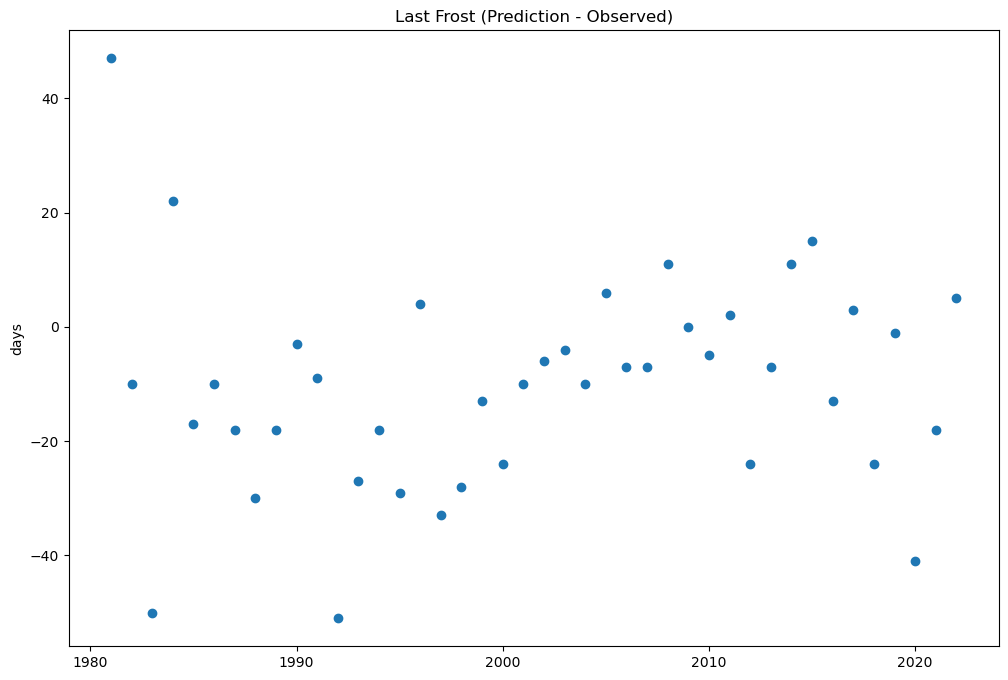

Max Offset = 6.5
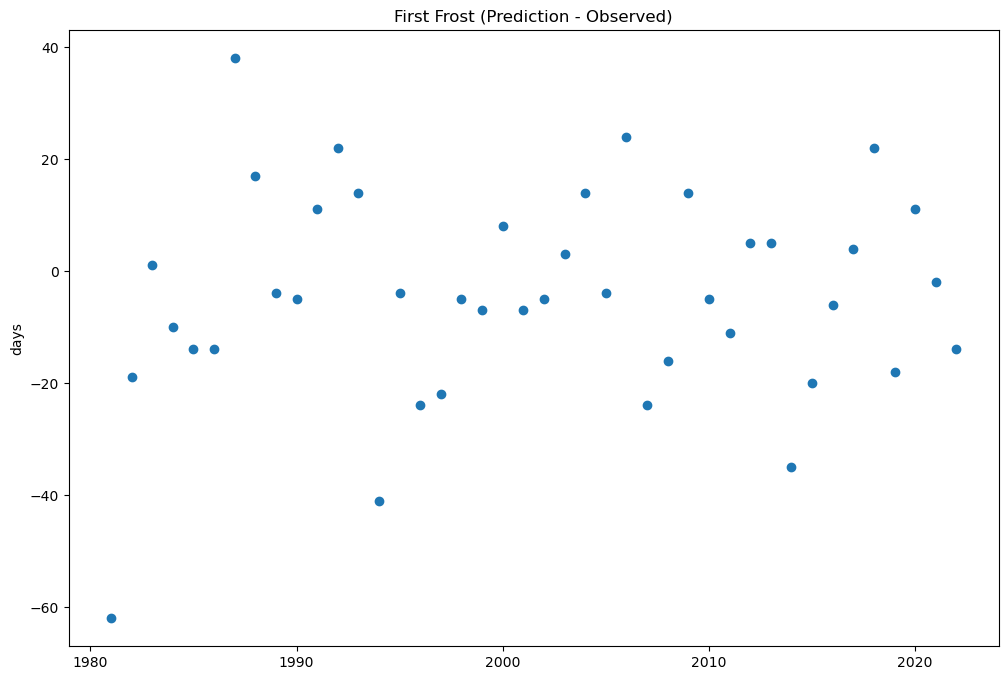

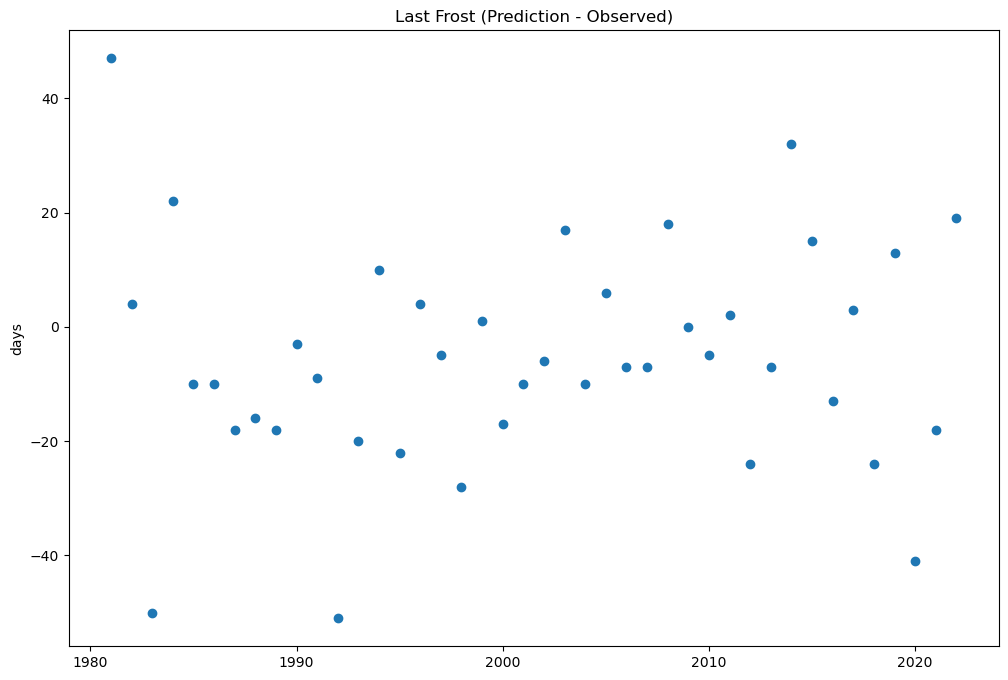

In [50]:
import scipy.stats

a, b = np.polyfit(df["tmin"], df["tmax"], 1)
result = scipy.stats.linregress(df["tmin"], df["tmax"])

Text(-20, 20, 'R: 0.9496077702043431')

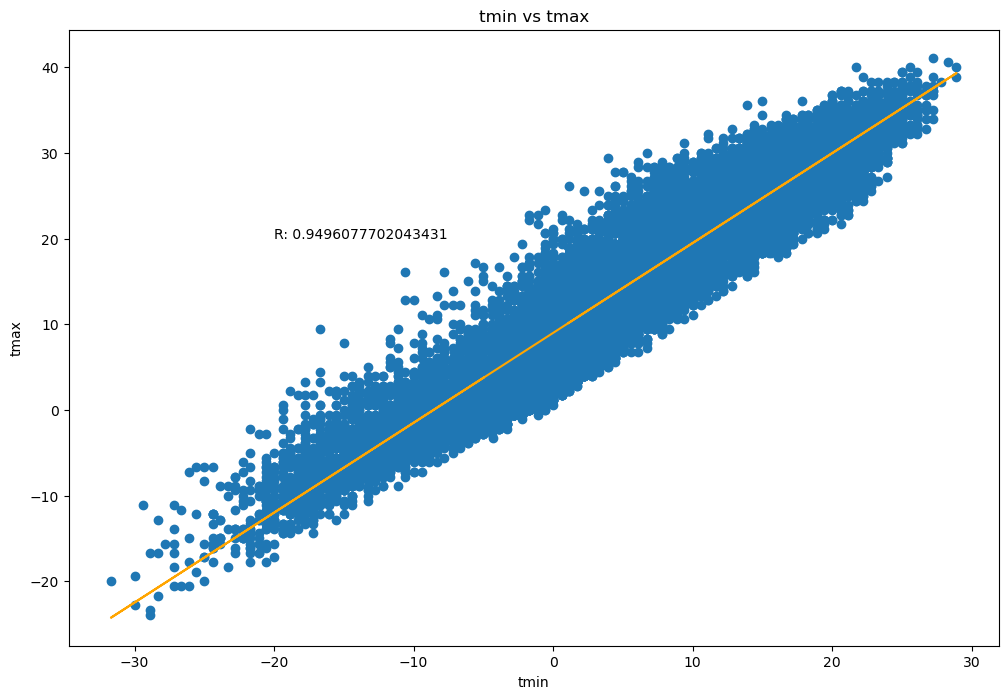

In [51]:
fig = plt.figure(figsize=(12, 8))
plt.scatter(x=df["tmin"], y=df["tmax"])
plt.plot(df["tmin"], a * df["tmin"] + b, color="orange")
ax = fig.get_axes()[0]
ax.set_title("tmin vs tmax")
ax.set_xlabel("tmin")
ax.set_ylabel("tmax")
ax.text(-20, 20, f"R: {result.rvalue}")

In [52]:
type(df["tmin"].resample("W").min().index.freq)

pandas._libs.tslibs.offsets.Week

In [53]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [54]:
fitted_model = ExponentialSmoothing(
    df["tmin"].resample("W").min(),
    trend="add",
    seasonal="add",
    seasonal_periods=52,
).fit()

In [55]:
fitted_model.data.orig_endog.tail(9).index

DatetimeIndex(['2021-11-07', '2021-11-14', '2021-11-21', '2021-11-28',
               '2021-12-05', '2021-12-12', '2021-12-19', '2021-12-26',
               '2022-01-02'],
              dtype='datetime64[ns]', name='time', freq='W-SUN')

In [56]:
df["tmin"][0:-9].tail()

time
2021-12-18    0.6
2021-12-19    0.0
2021-12-20   -0.6
2021-12-21   -2.8
2021-12-22   -6.7
Freq: D, Name: tmin, dtype: float64

In [57]:
df["tmin"].tail()

time
2021-12-27    1.1
2021-12-28    0.6
2021-12-29    0.0
2021-12-30    0.6
2021-12-31    1.1
Freq: D, Name: tmin, dtype: float64

In [58]:
import copy

In [59]:
df2 = copy.deepcopy(df)

In [60]:
df2 = df2.resample("W").min()

In [61]:
df2

,tavg,tmin,tmax,prcp,snow,wdir,wspd,wpgt,pres,tsun
time,,,,,,,,,,
1970-01-04,NaN,-15.6,-8.3,0.0,76.0,NaN,NaN,24.1,NaN,0.0
1970-01-11,NaN,-24.4,-17.8,0.0,76.0,NaN,NaN,27.7,NaN,0.0
1970-01-18,NaN,-16.7,-10.6,0.0,76.0,NaN,NaN,20.5,NaN,0.0
1970-01-25,NaN,-23.9,-17.8,0.0,152.0,NaN,NaN,29.5,NaN,0.0
1970-02-01,NaN,-7.8,0.6,0.0,0.0,NaN,NaN,33.5,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-05,1.5,-3.3,5.0,0.0,0.0,83.0,11.7,NaN,1010.2,NaN
2021-12-12,-7.2,-10.6,-3.9,0.0,0.0,65.0,12.2,NaN,1003.7,NaN
2021-12-19,1.5,-2.2,4.4,0.0,0.0,9.0,13.0,NaN,1010.5,NaN


In [70]:
ff = [x.days for x in first_frost_diffs]
ll = [x.days for x in last_frost_diffs]

In [71]:
f = pd.Series(ff)
l = pd.Series(ll)

In [77]:
f.abs().mean()

15.071428571428571

In [78]:
f.abs().std()

13.078362053673565

In [79]:
l.abs().mean()

23.69047619047619

In [80]:
l.abs().std()

15.158492902818047

In [2]:
for i in range(3):
    print(i)

0
1
2
